Trying to analyze what I look for in jobs

https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory

https://www.analyticsvidhya.com/blog/2017/03/read-commonly-used-formats-using-python/

In [4]:
#!pip install docx2txt

In [5]:
import glob

In [7]:
for filepath in glob.iglob('./Data/job_descriptions/*'):
    print('   ', filepath)

    ./Data/job_descriptions\Analytic Insights - PWC.docx
    ./Data/job_descriptions\BI Analyst - Indeed.docx
    ./Data/job_descriptions\BI Analyst Engineer - HT Group.docx
    ./Data/job_descriptions\BI Developer - GTS Technology Solutions.docx
    ./Data/job_descriptions\Data Analyst - Pulselight.docx
    ./Data/job_descriptions\Data Analyst - Square Root.docx
    ./Data/job_descriptions\Data Scientist - NIC.docx
    ./Data/job_descriptions\Data Scientist - Sense Corp.docx
    ./Data/job_descriptions\Digital Analyst - Pivotal Analytics.docx
    ./Data/job_descriptions\Marketing Analyst - Modernize.docx
    ./Data/job_descriptions\Marketing Data Analyst - Yeti.docx
    ./Data/job_descriptions\Senior BI analyst - OJO Labs.docx
    ./Data/job_descriptions\Senior Data Analyst - WP Engine.docx
    ./Data/job_descriptions\Senior Data Insights Analyst - HomeAway.docx
    ./Data/job_descriptions\Senior Financial Analyst, Marketing - Endurance International Group.docx
    ./Data/job_descript

In [8]:
import docx2txt

In [10]:
text = docx2txt.process("./Data/job_descriptions\Team lead data and reporting prime - indeed.docx")

In [11]:
text

"Team Lead, Data & Reporting- Prime\n\nIndeed\n\n\n\n353 reviews\n\n\n\n-\n\nAustin, TX 78731\n\nOur mission:\nAs the world’s number 1 job site, our mission is to help people get jobs. We need talented, passionate people working together to make this happen. We are looking to grow our teams with people who share our energy and enthusiasm for creating the best experience for job seekers.\xa0\n\nThe team:\nWe are a rapidly growing and focused product team building the most popular job site on the planet. Every month, over 200 million people count on Indeed to help them find jobs, make it easy to apply, research companies, and connect qualified candidates to their job openings. With product teams in Austin, Tokyo, Seattle, San Francisco, Singapore and Hyderabad, we are improving people's lives all around the world, one job at a time.\xa0\n\nYour job:\nThe Data & Reporting Lead is a part of the Business Operations team focusing on Indeed Prime. Indeed Prime is a job seeker marketplace that

In [12]:
import pandas as pd

In [23]:
docs_dict = {}
for filepath in glob.iglob('./Data/job_descriptions/*'):
    try: 
        docs_dict[filepath] =  docx2txt.process(filepath)
    except: 
        print('   bad file: ', filepath)

   bad file:  ./Data/job_descriptions\Marketing Data Analyst - Yeti.docx


In [56]:
df = pd.DataFrame(docs_dict, [0]).T.reset_index()

df.columns = ['title', 'description']

companies_list = []
for element in df.title.str.split(' - '):
    companies_list.append(element[1].replace('.docx', ''))

titles_list = []
for element in df.title.str.split(' - '):
    titles_list.append(element[0].replace("./Data/job_descriptions\\", ''))

df['title'] = titles_list
df['company'] = companies_list

df = df.loc[:, ['company', 'title', 'description']]

df.loc[:, 'description'] = df.description.str.replace('\n', ' ')

df.loc[:, 'description'] = df.description.str.replace('  ', ' ')

In [65]:
from wordcloud import WordCloud

In [66]:
import matplotlib.pyplot as plt

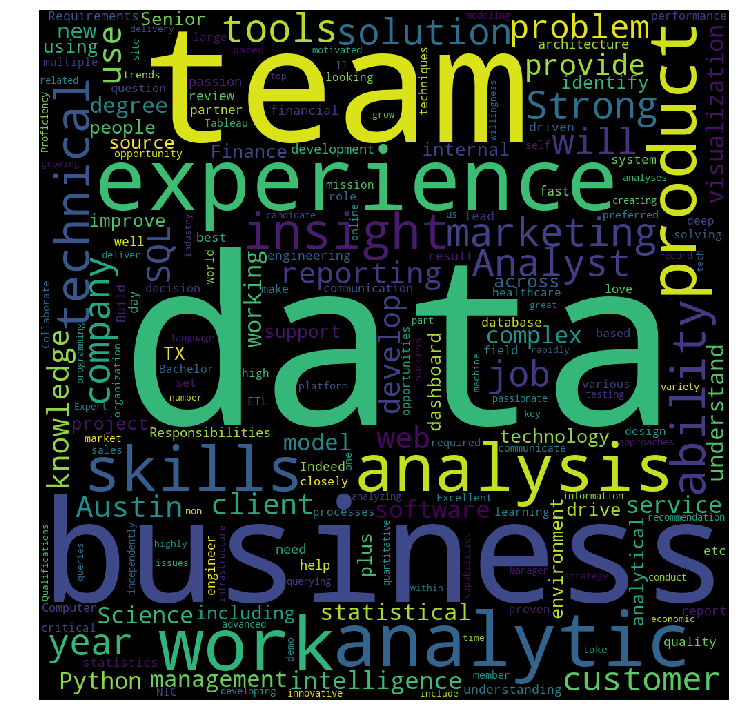

In [68]:
corpus_string = ''
for i in range(df.shape[0]):
    corpus_string = corpus_string + df.iloc[i]['description']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

In [69]:
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

In [110]:
corpus_cleaned = corpus_string

corpus_list = corpus_cleaned.split(' ')
corpus_list = [PorterStemmer().stem(word) for word in corpus_list if word not in stop_words.ENGLISH_STOP_WORDS]
corpus_cleaned = ' '.join(corpus_list)
df_corp = pd.DataFrame(index=[0], columns=['text'])
df_corp.iloc[0,0] = corpus_cleaned

In [116]:
cvec = CountVectorizer()

df_cvec_description = cvec.fit_transform(df_corp['text']).todense()
df_cvec_description = pd.DataFrame(df_cvec_description, columns=cvec.get_feature_names())
df_cvec_description = df_cvec_description.T.reset_index()
df_cvec_description.columns = ['word', 'count']

In [125]:
df_cvec_description.sort_values(by='count', ascending=False)

,word,count
307,data,182
173,busi,66
1215,team,65
1341,work,59
467,experi,57
68,analyt,42
1352,you,35
964,product,34
346,develop,31
1294,use,30


In [126]:
!pip install wordfreq

  Running setup.py bdist_wheel for wordfreq: started
  Running setup.py bdist_wheel for wordfreq: finished with status 'done'
  Stored in directory: C:\Users\conor\AppData\Local\pip\Cache\wheels\c8\ef\20\7192ee178bc862f6e49718d96916edc1276b70a50d5b90e47a
  Running setup.py bdist_wheel for langcodes: started
  Running setup.py bdist_wheel for langcodes: finished with status 'done'
  Stored in directory: C:\Users\conor\AppData\Local\pip\Cache\wheels\84\20\3d\dc2010b4f7c0b786a06947530a962972caead0c58898f25a02
  Running setup.py bdist_wheel for marisa-trie: started
  Running setup.py bdist_wheel for marisa-trie: finished with status 'error'
  Complete output from command c:\programdata\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\conor\\AppData\\Local\\Temp\\pip-install-lzf25x6b\\marisa-trie\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\conor

  Failed building wheel for marisa-trie
Command "c:\programdata\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\conor\\AppData\\Local\\Temp\\pip-install-lzf25x6b\\marisa-trie\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\conor\AppData\Local\Temp\pip-record-w_wew1hy\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\conor\AppData\Local\Temp\pip-install-lzf25x6b\marisa-trie\


In [ ]:
"""https://pypi.org/project/wordfreq/
"""

In [127]:
from wordfreq import word_frequency

ModuleNotFoundError: No module named 'wordfreq'

In [128]:
"https://medium.com/@Alexander_H/scraping-wikipedia-with-python-8000fc9c9e6c"

'https://medium.com/@Alexander_H/scraping-wikipedia-with-python-8000fc9c9e6c'